In [1]:
# Import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, accuracy_score, \
recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import functions notebook and load data set here
import sys
sys.path.append("../")
from Modeling_functions import *

In [3]:
df=pd.read_csv('../data/Season_2019.csv')

In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
n = 50
df=df.head(int(len(df)*(n/100)))

In [6]:
n = 50
df2=df.tail(int(len(df)*(n/100)))

Find and eliminate NaNs

In [7]:
df=df.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
          'H_Opp_win_probability_subtracted'],axis=1)

In [8]:
df2=df2.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
          'H_Opp_win_probability_subtracted'],axis=1)

In [9]:
df.home_win.value_counts(normalize=True)

1    0.526793
0    0.473207
Name: home_win, dtype: float64

In [10]:
df2.home_win.value_counts(normalize=True)

1    0.516502
0    0.483498
Name: home_win, dtype: float64

In [11]:
#df2.drop_duplicates(inplace=True)
df2

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
607,CHW,34.341615,4.397516,8.962733,4.198758,4.116770,2.347826,9.621118,37.527950,0.255795,...,10.000000,14.617284,6.345679,0.000000,50.265432,1.596273,0.534161,0.014932,0.192593,0
608,SFG,34.438272,4.185185,8.222222,4.043210,3.882099,2.932099,8.858025,38.086420,0.233296,...,11.679012,14.888889,6.654321,0.006173,53.833333,1.227848,0.373418,0.062080,0.395062,0
609,MIN,35.382716,5.796296,9.549383,5.592593,5.562531,3.240741,8.234568,39.456790,0.263704,...,10.851852,15.228395,6.753086,0.006173,49.086420,1.734177,0.474684,0.030951,0.147531,1
610,ATL,34.320988,5.277778,8.839506,5.086420,5.011049,3.820988,9.055556,38.901235,0.252728,...,11.524691,13.500000,6.240741,0.006173,51.290123,1.614907,0.559006,-0.000358,-0.085802,0
611,MIA,34.024691,3.796296,8.185185,3.660494,3.545988,2.438272,9.067901,37.314815,0.234074,...,10.975309,13.438272,6.012346,0.000000,50.345679,1.614907,0.440994,0.014716,0.109877,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,MIA,34.024691,3.796296,8.185185,3.660494,3.545988,2.438272,9.067901,37.314815,0.234074,...,10.870370,14.080247,6.302469,0.012346,48.283951,1.660494,0.604938,-0.046185,-0.594444,0
1209,MIL,34.209877,4.746914,8.432099,4.592593,4.552593,3.882716,9.648148,38.944444,0.242580,...,11.462963,14.932099,6.709877,0.000000,50.086420,1.345912,0.459119,0.001488,0.021605,0
1210,NYM,34.716049,4.882716,8.919753,4.734568,4.590926,3.185185,8.543210,38.827160,0.252296,...,12.148148,13.956790,6.567901,0.006173,50.203704,1.416149,0.484472,-0.045481,-0.516667,0
1211,TBR,34.740741,4.746914,8.808642,4.506173,4.573704,3.345679,9.216049,38.796296,0.249895,...,11.395062,15.259259,6.746914,0.006173,49.888889,1.388889,0.493827,0.022778,0.111728,0


In [12]:
df.head()

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
0,NYY,34.462963,5.820988,9.216049,5.580247,5.632593,3.512346,8.870370,38.549383,0.262302,...,11.413580,16.395062,7.179012,0.000000,50.549383,1.385093,0.347826,0.068586,0.470370,1
1,TBR,34.740741,4.746914,8.808642,4.506173,4.573704,3.345679,9.216049,38.796296,0.249895,...,10.450617,13.179012,5.604938,0.018519,44.759259,1.679245,0.515723,-0.041290,-0.733333,0
2,TEX,34.197531,5.000000,8.481481,4.722222,4.666852,3.296296,9.740741,38.296296,0.242006,...,11.913580,13.555556,6.617284,0.000000,48.759259,1.487654,0.462963,-0.006420,-0.281481,0
3,MIA,34.024691,3.796296,8.185185,3.660494,3.545988,2.438272,9.067901,37.314815,0.234074,...,13.172840,14.685185,7.179012,0.000000,48.524691,1.347826,0.453416,0.017148,-0.015432,0
4,TOR,33.907407,4.481481,8.018519,4.302469,4.286975,3.141975,9.345679,37.598765,0.229025,...,11.869565,15.248447,6.645963,0.006211,54.776398,1.139241,0.316456,0.134677,1.446584,0


In [16]:
df2.head()

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
607,CHW,34.341615,4.397516,8.962733,4.198758,4.116770,2.347826,9.621118,37.527950,0.255795,...,10.000000,14.617284,6.345679,0.000000,50.265432,1.596273,0.534161,0.014932,0.192593,0
608,SFG,34.438272,4.185185,8.222222,4.043210,3.882099,2.932099,8.858025,38.086420,0.233296,...,11.679012,14.888889,6.654321,0.006173,53.833333,1.227848,0.373418,0.062080,0.395062,0
609,MIN,35.382716,5.796296,9.549383,5.592593,5.562531,3.240741,8.234568,39.456790,0.263704,...,10.851852,15.228395,6.753086,0.006173,49.086420,1.734177,0.474684,0.030951,0.147531,1
610,ATL,34.320988,5.277778,8.839506,5.086420,5.011049,3.820988,9.055556,38.901235,0.252728,...,11.524691,13.500000,6.240741,0.006173,51.290123,1.614907,0.559006,-0.000358,-0.085802,0
611,MIA,34.024691,3.796296,8.185185,3.660494,3.545988,2.438272,9.067901,37.314815,0.234074,...,10.975309,13.438272,6.012346,0.000000,50.345679,1.614907,0.440994,0.014716,0.109877,0


In [17]:
def data_preprocessing(df, df2):
    X_train = df.drop(['home_win','H_name','A_name'], axis=1)
    X_test = df2.drop(['home_win','H_name','A_name'], axis=1)
    y_train = df.home_win
    y_test= df2.home_win
    
    ss = StandardScaler()
    X_train_scaled = ss.fit_transform(X_train)
    X_test_scaled = ss.transform(X_test)
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    return X_train_scaled, X_test_scaled,y_train,y_test

In [18]:
X_train_scaled,X_test_scaled,y_train,y_test=data_preprocessing(df,df2)

In [19]:
# X_test_scaled.drop(['H_Opp_inherited_score','H_Opp_game_score','H_Opp_unknown_bat_type',
#                     'H_Opp_inherited_runners'],axis=1,inplace=True)

In [20]:
# X_train_scaled.drop(['H_Opp_inherited_score','H_Opp_game_score','H_Opp_unknown_bat_type',
#                     'H_Opp_inherited_runners'],axis=1,inplace=True)

## Feature Selection

In [26]:
def new_acc(probabilities):
    class_list2=[]
    for log in probabilities:
        if log[0]<.40:
            class_list2.append(1)
        elif log[0]>.60:
            class_list2.append(0)
        else:
            class_list2.append(3)
    y_pred_class=pd.DataFrame(class_list2)
    y_pred_class.reset_index(inplace=True)
    y_test_df=pd.DataFrame(y_test)
    y_test_df.reset_index(inplace=True)
    comb=pd.concat([y_test_df,y_pred_class],axis=1)
    comb.drop(['index','index'],axis=1,inplace=True)
    comb['pred']=comb[0]
    comb.drop([0],axis=1,inplace=True)
    comb.drop(comb[comb['pred'] == 3].index, inplace = True)
    count=0
    for bools in comb['home_win']==comb['pred']:
        if bools is True:
            count+=1
        else:
            pass
    accuracy=count/len(comb)
    
    return accuracy,count

### RFECV

In [28]:
rfeats= feature_select(X_train_scaled,y_train,RandomForestClassifier,min_features=10)
X_train_best_for = X_train_scaled[rfeats]
X_test_best_for = X_test_scaled[rfeats]

Number of Trees: 115
criterion: gini
Mean Cross-Val Score: 0.547413529231711
Train Mean Accuracy: 0.7271228359439407
Test Mean Accuracy: 0.7227722772277227
Recall Score: 0.7667731629392971
Precision Score: 0.7164179104477612
F1 score: 0.7407407407407407


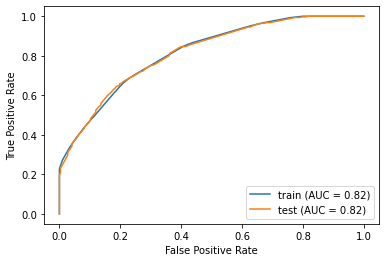

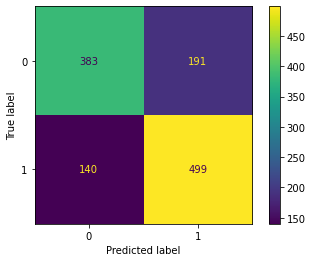

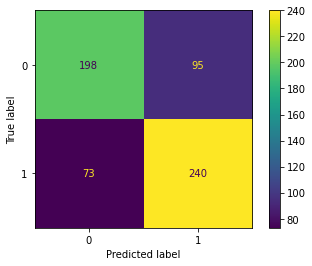

In [29]:
predictions,probabilities=random_forest(X_train_best_for,X_test_best_for,y_train,y_test)

In [30]:
new_acc(probabilities)

(0.7848101265822784, 372)

### PCA

In [31]:
pca=PCA(n_components=0.9)
train_pca=pca.fit_transform(X_train_scaled)
test_pca=pca.transform(X_test_scaled)

Number of Trees: 75
criterion: gini
Mean Cross-Val Score: 0.5325511002278679
Train Mean Accuracy: 0.7271228359439407
Test Mean Accuracy: 0.7227722772277227
Recall Score: 0.7763578274760383
Precision Score: 0.7126099706744868
F1 score: 0.743119266055046


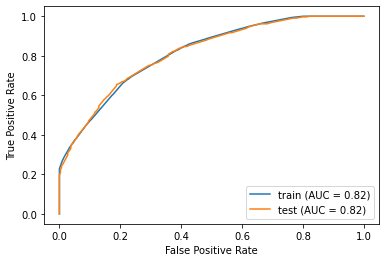

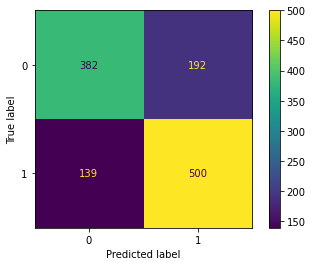

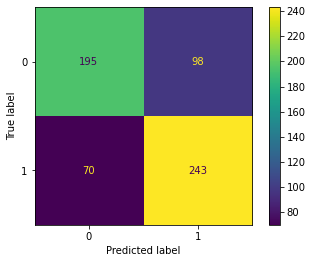

In [32]:
predictions,probabilities=random_forest(train_pca,test_pca,y_train,y_test)

In [33]:
new_acc(probabilities)

(0.7883369330453563, 365)